In [ ]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
team_list = []
wins_list = []
losses_list = []
ties_list = []
wins_loss_perc_list = []
points_list = []
points_opp_list = []
points_diff_list = []
pass_td_list = []
mov_list = []
rush_att_list = []
sos_total_list = []
srs_total_list = []
srs_offense_list = []
srs_defense_list = []
url_list = []

In [ ]:
for year in range(2018, 2023):
    url = f"https://www.pro-football-reference.com/years/{year}/index.htm"
    response = requests.get(url)
    html_content = response.text
    soup = BeautifulSoup(html_content, 'html.parser')

    team = [team.text.strip('*+') for team in soup.find_all('th', attrs={'data-stat': 'team', 'scope': 'row'})]
    wins = [wins.text for wins in soup.find_all('td', attrs={'data-stat': 'wins'})]
    losses = [losses.text for losses in soup.find_all('td', attrs={'data-stat': 'losses'})]
    ties = [ties.text for ties in soup.find_all('td', attrs={'data-stat': 'ties'})]
    wins_loss_perc = [win_loss_perc.text for win_loss_perc in soup.find_all('td', attrs={'data-stat': 'win_loss_perc'})]
    points = [points.text for points in soup.find_all('td', attrs={'data-stat': 'points'})]
    points_opp = [points_opp.text for points_opp in soup.find_all('td', attrs={'data-stat': 'points_opp'})]
    points_diff = [points_diff.text for points_diff in soup.find_all('td', attrs={'data-stat': 'points_diff'})]
    mov = [mov.text for mov in soup.find_all('td', attrs={'data-stat': 'mov'})]
    sos_total = [sos_total.text for sos_total in soup.find_all('td', attrs={'data-stat': 'sos_total'})]
    srs_total = [srs_total.text for srs_total in soup.find_all('td', attrs={'data-stat': 'srs_total'})]
    srs_offense = [srs_offense.text for srs_offense in soup.find_all('td', attrs={'data-stat': 'srs_offense'})]
    srs_defense = [srs_defense.text for srs_defense in soup.find_all('td', attrs={'data-stat': 'srs_defense'})]
    urls = [url] * len(wins)

    team_list += team
    wins_list += wins
    losses_list += losses
    ties_list += ties
    wins_loss_perc_list += wins_loss_perc
    points_list += points
    points_opp_list += points_opp
    points_diff_list += points_diff
    mov_list += mov
    sos_total_list += sos_total
    srs_total_list += srs_total
    srs_offense_list += srs_offense
    srs_defense_list += srs_defense
    url_list += urls


In [ ]:
len(wins_list), len(url_list), len(team_list)

(160, 160, 160)

In [ ]:
team_list

['New England Patriots',
 'Miami Dolphins',
 'Buffalo Bills',
 'New York Jets',
 'Baltimore Ravens',
 'Pittsburgh Steelers',
 'Cleveland Browns',
 'Cincinnati Bengals',
 'Houston Texans',
 'Indianapolis Colts',
 'Tennessee Titans',
 'Jacksonville Jaguars',
 'Kansas City Chiefs',
 'Los Angeles Chargers',
 'Denver Broncos',
 'Oakland Raiders',
 'Dallas Cowboys',
 'Philadelphia Eagles',
 'Washington Redskins',
 'New York Giants',
 'Chicago Bears',
 'Minnesota Vikings',
 'Green Bay Packers',
 'Detroit Lions',
 'New Orleans Saints',
 'Atlanta Falcons',
 'Carolina Panthers',
 'Tampa Bay Buccaneers',
 'Los Angeles Rams',
 'Seattle Seahawks',
 'San Francisco 49ers',
 'Arizona Cardinals',
 'New England Patriots',
 'Buffalo Bills',
 'New York Jets',
 'Miami Dolphins',
 'Baltimore Ravens',
 'Pittsburgh Steelers',
 'Cleveland Browns',
 'Cincinnati Bengals',
 'Houston Texans',
 'Tennessee Titans',
 'Indianapolis Colts',
 'Jacksonville Jaguars',
 'Kansas City Chiefs',
 'Denver Broncos',
 'Oakland Ra

In [ ]:
standings = pd.DataFrame({'Team': team_list,
        'Wins': wins_list,
        'Losses': losses_list,
        'Ties': ties_list,
        'Win-Loss Percentage': wins_loss_perc_list,
        'Points For': points_list,
        'Points Against': points_opp_list,
        'Points Differential': points_diff_list,
        'Margin of Victory': mov_list,
        'Strength of Schedule': sos_total_list,
        'Simple Rating System': srs_total_list,
        'Offensive Simple Rating System': srs_offense_list,
        'Defensive Simple Rating System': srs_defense_list,
        'URL': url_list
       })

In [ ]:
standings.shape

(160, 14)

In [ ]:
standings['Year'] = standings['URL'].str.extract(r'(\d{4})')
standings.columns

Index(['Team', 'Wins', 'Losses', 'Ties', 'Win-Loss Percentage', 'Points For',
       'Points Against', 'Points Differential', 'Margin of Victory',
       'Strength of Schedule', 'Simple Rating System',
       'Offensive Simple Rating System', 'Defensive Simple Rating System',
       'URL', 'Year'],
      dtype='object')

In [ ]:
standings = standings.drop(columns=['URL'])

In [ ]:
team_list

['New England Patriots',
 'Miami Dolphins',
 'Buffalo Bills',
 'New York Jets',
 'Baltimore Ravens',
 'Pittsburgh Steelers',
 'Cleveland Browns',
 'Cincinnati Bengals',
 'Houston Texans',
 'Indianapolis Colts',
 'Tennessee Titans',
 'Jacksonville Jaguars',
 'Kansas City Chiefs',
 'Los Angeles Chargers',
 'Denver Broncos',
 'Oakland Raiders',
 'Dallas Cowboys',
 'Philadelphia Eagles',
 'Washington Redskins',
 'New York Giants',
 'Chicago Bears',
 'Minnesota Vikings',
 'Green Bay Packers',
 'Detroit Lions',
 'New Orleans Saints',
 'Atlanta Falcons',
 'Carolina Panthers',
 'Tampa Bay Buccaneers',
 'Los Angeles Rams',
 'Seattle Seahawks',
 'San Francisco 49ers',
 'Arizona Cardinals',
 'New England Patriots',
 'Buffalo Bills',
 'New York Jets',
 'Miami Dolphins',
 'Baltimore Ravens',
 'Pittsburgh Steelers',
 'Cleveland Browns',
 'Cincinnati Bengals',
 'Houston Texans',
 'Tennessee Titans',
 'Indianapolis Colts',
 'Jacksonville Jaguars',
 'Kansas City Chiefs',
 'Denver Broncos',
 'Oakland Ra

In [ ]:
afc_east = ['New England Patriots',
            'Miami Dolphins',
            'Buffalo Bills',
            'New York Jets']
afc_north = ['Baltimore Ravens',
            'Pittsburgh Steelers',
            'Cleveland Browns',
            'Cincinnati Bengals']
afc_south = ['Jacksonville Jaguars',
            'Tennessee Titans',
            'Indianapolis Colts',
            'Houston Texans']
afc_west = ['Kansas City Chiefs',
            'Los Angeles Chargers',
            'Las Vegas Raiders',
            'Denver Broncos',
            'Oakland Raiders']


nfc_east = ['Philadelphia Eagles',
            'Dallas Cowboys',
            'New York Giants',
            'Washington Commanders',
            'Washington Redskins',
            'Washington Football Team']
nfc_north = ['Minnesota Vikings',
              'Detroit Lions',
              'Green Bay Packers',
              'Chicago Bears']
nfc_south = ['Tampa Bay Buccaneers',
              'Carolina Panthers',
              'New Orleans Saints',
              'Atlanta Falcons']
nfc_west = ['San Francisco 49ers',
            'Seattle Seahawks',
            'Los Angeles Rams',
            'Arizona Cardinals']

In [ ]:
division_dict = {}
for team in afc_east:
    division_dict[team] = 'AFC East'
for team in afc_north:
    division_dict[team] = 'AFC North'
for team in afc_south:
    division_dict[team] = 'AFC South'
for team in afc_west:
    division_dict[team] = 'AFC West'
for team in nfc_east:
    division_dict[team] = 'NFC East'
for team in nfc_north:
    division_dict[team] = 'NFC North'
for team in nfc_south:
    division_dict[team] = 'NFC South'
for team in nfc_west:
    division_dict[team] = 'NFC West'

standings['division_region'] = standings['Team'].map(division_dict)


In [ ]:
standings

,Team,Wins,Losses,Ties,Win-Loss Percentage,Points For,Points Against,Points Differential,Margin of Victory,Strength of Schedule,Simple Rating System,Offensive Simple Rating System,Defensive Simple Rating System,Year,division_region
0,New England Patriots,11,5,0,.688,436,325,111,6.9,-1.8,5.2,3.1,2.1,2018,AFC East
1,Miami Dolphins,7,9,0,.438,319,433,-114,-7.1,-1.7,-8.8,-3.6,-5.2,2018,AFC East
2,Buffalo Bills,6,10,0,.375,269,374,-105,-6.6,-0.3,-6.9,-6.3,-0.6,2018,AFC East
3,New York Jets,4,12,0,.250,333,441,-108,-6.8,-1.1,-7.8,-2.0,-5.9,2018,AFC East
4,Baltimore Ravens,10,6,0,.625,389,287,102,6.4,0.6,7.0,0.6,6.4,2018,AFC North
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Atlanta Falcons,7,10,0,.412,365,386,-21,-1.2,-0.9,-2.1,-0.1,-2.0,2022,NFC South
156,San Francisco 49ers,13,4,0,.765,450,277,173,10.2,-2.3,7.9,3.3,4.6,2022,NFC West
157,Seattle Seahawks,9,8,0,.529,407,401,6,0.4,-0.8,-0.5,1.9,-2.4,2022,NFC West
158,Los Angeles Rams,5,12,0,.294,307,384,-77,-4.5,0.5,-4.0,-4.1,0.0,2022,NFC West


In [ ]:
standings['Ranking'] = standings.groupby(['Year', 'division_region'])['Win-Loss Percentage'].rank(method='first', ascending=False)
standings

,Team,Wins,Losses,Ties,Win-Loss Percentage,Points For,Points Against,Points Differential,Margin of Victory,Strength of Schedule,Simple Rating System,Offensive Simple Rating System,Defensive Simple Rating System,Year,division_region,Ranking
0,New England Patriots,11,5,0,.688,436,325,111,6.9,-1.8,5.2,3.1,2.1,2018,AFC East,1.0
1,Miami Dolphins,7,9,0,.438,319,433,-114,-7.1,-1.7,-8.8,-3.6,-5.2,2018,AFC East,2.0
2,Buffalo Bills,6,10,0,.375,269,374,-105,-6.6,-0.3,-6.9,-6.3,-0.6,2018,AFC East,3.0
3,New York Jets,4,12,0,.250,333,441,-108,-6.8,-1.1,-7.8,-2.0,-5.9,2018,AFC East,4.0
4,Baltimore Ravens,10,6,0,.625,389,287,102,6.4,0.6,7.0,0.6,6.4,2018,AFC North,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,Atlanta Falcons,7,10,0,.412,365,386,-21,-1.2,-0.9,-2.1,-0.1,-2.0,2022,NFC South,4.0
156,San Francisco 49ers,13,4,0,.765,450,277,173,10.2,-2.3,7.9,3.3,4.6,2022,NFC West,1.0
157,Seattle Seahawks,9,8,0,.529,407,401,6,0.4,-0.8,-0.5,1.9,-2.4,2022,NFC West,2.0
158,Los Angeles Rams,5,12,0,.294,307,384,-77,-4.5,0.5,-4.0,-4.1,0.0,2022,NFC West,3.0


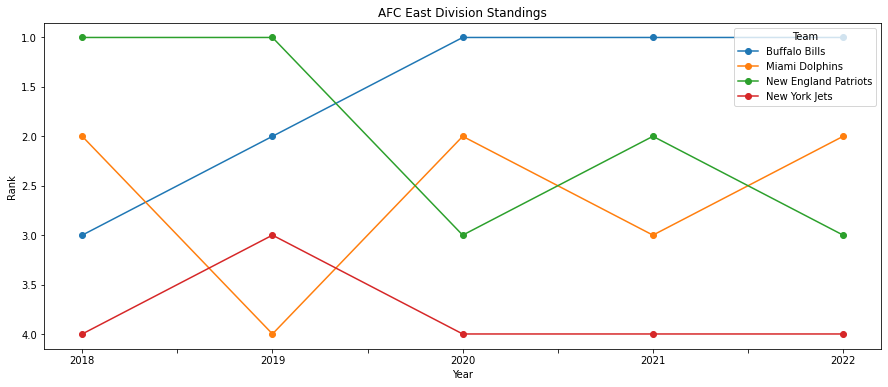

In [ ]:
# Filter the data to only include the AFC East division
afc_east = standings[standings['division_region'] == 'AFC East']

# Create a pivot table with the year as the index and the team as the columns
afc_east_pivot = pd.pivot_table(afc_east, values='Ranking', index='Year', columns='Team')

# Plot the pivot table as a line graph
fig, ax = plt.subplots(figsize=(15, 6))
afc_east_pivot.plot(kind='line', marker='o',ax=ax)


# Add labels and titles to the graph
plt.xlabel('Year')
plt.ylabel('Rank')
plt.title('AFC East Division Standings')

# Reverse the order of the y-axis
ax.invert_yaxis()

# Show the graph
plt.show()

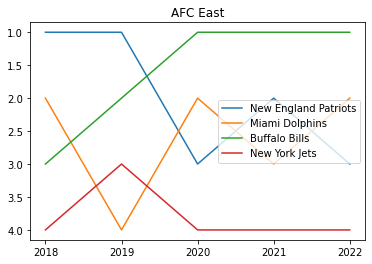

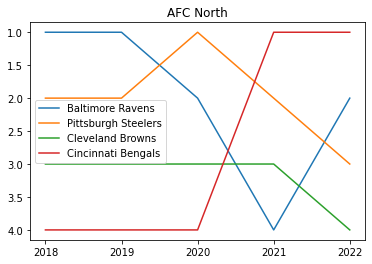

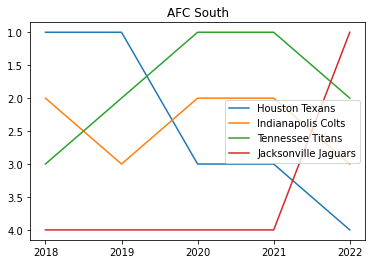

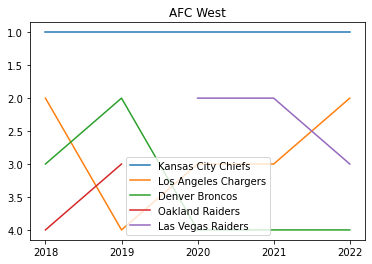

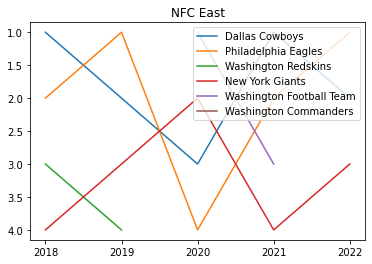

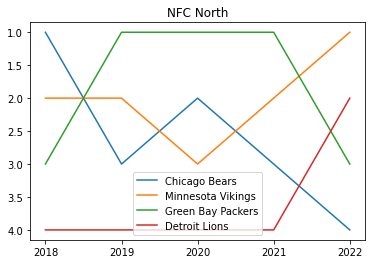

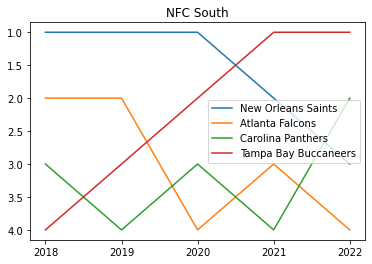

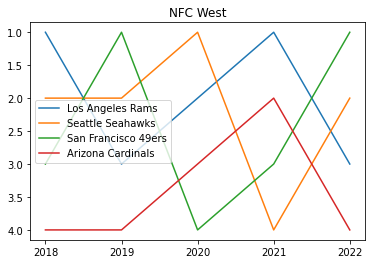

In [ ]:
divisions = standings['division_region'].unique()

# iterate through each division
for division in divisions:
    division_df = standings[standings['division_region'] == division]

    # create a figure and axis
    fig, ax = plt.subplots()

    # plot each team's rank over time
    for team in division_df['Team'].unique():
        team_df = division_df[division_df['Team'] == team]
        ax.plot(team_df['Year'], team_df['Ranking'], label=team)

    # invert the y-axis
    ax.invert_yaxis()

    # add a title and legend
    ax.set_title(division)
    ax.legend()

    # show the plot
    plt.show()

**Bar Plot**

In [ ]:
# Filter down to one Team, calculate its statistics
teams = standings['Team'].unique()
teams

In [ ]:
# Filter the rows where Year is in the year 2022
filtered_df = standings.loc[standings['Year'].astype(str).str[:4] == '2022']

filtered_df

In [ ]:
# Convert the Losses and Wins columns to integers
filtered_df['Losses'] = filtered_df['Losses'].astype(int)
filtered_df['Wins'] = filtered_df['Wins'].astype(int)

# Plot the filtered DataFrame
cols = ['Losses', 'Wins']
filtered_df[cols].plot(kind='bar', stacked=True, figsize=(15, 4))

In [ ]:
filtered_df['pad'] = 16 - filtered_df['Losses']

In [ ]:
# Custom Colors
cols = ['pad', 'Losses', 'Wins']
win_loss_colors = ['white', 'lightsalmon', 'green']
filtered_df[cols].plot(kind='bar', stacked=True, figsize=(15, 4),
                    legend=False,
                    color=win_loss_colors);

In [ ]:
# Set Index
cols = ['pad', 'Losses', 'Wins']
win_loss_colors = ['white', 'lightsalmon', 'green']
filtered_df.set_index('Team')[cols].plot(kind='bar', stacked=True, figsize=(15, 4),
                    legend=False,
                    color=win_loss_colors);

In [ ]:
# Sort By Wins
cols = ['pad', 'Losses', 'Wins']
win_loss_colors = ['white', 'lightsalmon', 'green']
filtered_df.set_index('Team')[cols].sort_values('Wins', ascending=False).plot(kind='bar', stacked=True, figsize=(15, 4),
                    legend=False,
                    color=win_loss_colors);

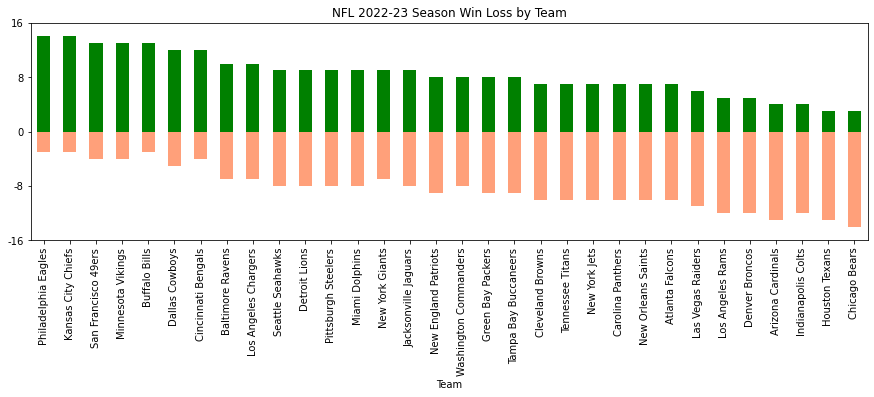

In [ ]:
# Changing the Y-axis Labels
cols = ['pad', 'Losses', 'Wins']
win_loss_colors = ['white', 'lightsalmon', 'green']
filtered_df.set_index('Team')[cols].sort_values('Wins', ascending=False).plot(kind='bar', stacked=True, figsize=(15, 4),
                    legend=False,
                    color=win_loss_colors);

tick_pos = [0, 8, 16, 24, 32]
custom_labels = [-16, -8, 0, 8, 16]
plt.yticks(ticks=tick_pos, labels=custom_labels);
plt.title('NFL 2022-23 Season Win Loss by Team');